In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import math
import scipy
import sklearn
import matplotlib
import sys
%matplotlib inline
import sklearn
plt.style.use('seaborn')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [2]:
x = np.array([(1,2,3),(4,5,6)])
a = x.shape[0]
b = np.ones(a).reshape(-1,1)
b.shape
c = np.hstack((x,b))
c
type(np.array([1,1]))

numpy.ndarray

In [89]:
"""
b = (xT x)-1 xT y
reference for deveration : https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression
"""

class linear_regression:
    
    def __init__(self, W_intercept = True ):
        """
        intercept = whether to use y intercept or not
        """
        
        self.coef_ = None
        self.intercept = W_intercept
        self.is_fit = False
        
    def pandas_to_numpy(self, X):
        """
        Convertion of dataframes and series to matrix
        """
        if type(X) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return X.as_matrix()
        if type(X) == type(np.array([1,1])):
            return X
        return np.array(X)
    
    def one_d_data(self, X):
        
        if X.ndim == 1:
            X = X.reshape(-1,1)
        return X
    
    def convert_to_array(self, X):
        
        X = self.pandas_to_numpy(X)
        X = self.one_d_data(X)
        return X
    
    
    def add_intercept(self, X):
        """
        Adding 1 for the intercept term
        x= [2,3,4] result = [2,3,4,1]
        """
        rows = X.shape[0]
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))
    
    def fit(self, X, y):
        
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        y.reshape(-1,1)
        
        if self.intercept:
            X = self.add_intercept(X)
        
        """
        b = (xT x)-1 (xT y)
        """
        invXTX = np.linalg.inv(np.dot(X.T,X))
        XTY = np.dot(X.T,y)
        
        self.coef_ = np.dot(invXTX, XTY)
        self.is_fit = True
        
    def predict(self, X):
        
        if not self.is_fit:
             raise ValueError("You have to run the 'fit' method before using predict!")
        
        X = self.convert_to_array(X)
        
        if self.intercept:
            X = self.add_intercept(X)
        
        return np.dot(X, self.coef_)
    
    def score(self, X, y):
        
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X)
        return np.mean((np.array(pred)- np.array(y))**2)
    

In [109]:
X = np.random.uniform(0,10,100)
y = 4*X + np.random.normal(0,1.5,100) + 10

In [110]:
lr = linear_regression(W_intercept = True)
lr.fit(X,y)
lr.coef_

array([[ 3.96648834],
       [10.16694391]])

In [121]:
from sklearn import linear_model
RR = linear_model.Ridge(alpha=0)
X = X.reshape(-1, 1)
RR.fit(X,y)
RR.coef_

array([3.96648834])

In [112]:
predicted = lr.predict(X)
predicted.shape
y.shape

(100,)

In [113]:
lr.score(X,y)

1.6235996862586293

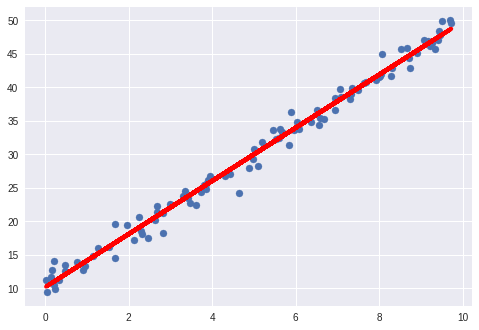

In [120]:
plt.scatter(X,y)
plt.plot(X,predicted,'r-',lw=4)